In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('newData2.csv')
df.head(5)

C:\Users\fathi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,gender,backlogs,sleep,concentration,age,academic_level,currently_satisfied,absent_days,time,info_delivery,learning_strategy,mental_activities,raise_hands,study_time,grades
0,Female,None,Less than 7hr,15min - 30min,20-25,UNDER GRADUATE,Neutral,Less than 10,pomodoro,Read/Write,feyman,"Exploring creative endeavors like writing, dra...",3,Less than 1 hour,70-90%
1,Female,None,7hr,15min - 30min,20-25,UNDER GRADUATE,Neutral,Less than 10,pomodoro,Visual (Pictures / Diagrams),flowtime,Immersing myself in deep and thought-provoking...,1,Less than 1 hour,70-90%
2,Female,None,More than 7hr,15min - 30min,20-25,UNDER GRADUATE,Slightly,Less than 30,pomodoro,Auditory,flowtime,"Exploring creative endeavors like writing, dra...",1,Less than 1 hour,Greater than 90%
3,Female,None,Less than 7hr,15min - 30min,15-20,UNDER GRADUATE,Slightly,Less than 30,time_blocking,Read/Write,feyman,Solving puzzles and brainteasers.,1,Less than 1 hour,50-70%
4,Male,None,Less than 7hr,Less than 15min,20-25,UNDER GRADUATE,vey much,Less than 30,time_blocking,Visual (Pictures / Diagrams),feyman,Engaging in critical thinking and problem-solv...,4,Less than 1 hour,70-90%


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.columns:
    # Check if the column contains non-numeric data
    if df[column].dtype == 'object':
        # Initialize label encoder for the column
        label_encoders[column] = LabelEncoder()
        # Encode the values in the column and replace them with integers
        df[column] = label_encoders[column].fit_transform(df[column])
df.head(5)

,gender,backlogs,sleep,concentration,age,academic_level,currently_satisfied,absent_days,time,info_delivery,learning_strategy,mental_activities,raise_hands,study_time,grades
0,0,2,1,0,1,3,1,1,0,5,1,2,3,1,1
1,0,2,0,0,1,3,1,1,0,6,2,3,1,1,1
2,0,2,2,0,1,3,3,2,0,2,2,2,1,1,2
3,0,2,1,0,0,3,3,2,1,5,1,8,1,1,0
4,1,2,1,2,1,3,4,2,1,6,1,1,4,1,1


In [ ]:
#cleaning
# Drop rows with missing values
cleaned_data = df.dropna()
#dropping duplicates
cleaned_data = df.drop_duplicates()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = df.drop(columns=['learning_strategy'])  # Features
y = df['learning_strategy']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Scaling numerical features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the Decision Tree classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print('Test accuracy:', accuracy)


from scipy.stats import mode

# Compute the mode (most frequent value) of predictions across samples
final_prediction, _ = mode(predictions)

# Convert the mode to a scalar value if it's an array
final_prediction = final_prediction.item() if isinstance(final_prediction, np.ndarray) else final_prediction

# Print the final prediction
print('Final Prediction:', final_prediction)



Test accuracy: 0.47058823529411764
Final Prediction: 1


C:\Users\fathi\AppData\Local\Temp\ipykernel_10164\917258353.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_prediction, _ = mode(predictions)


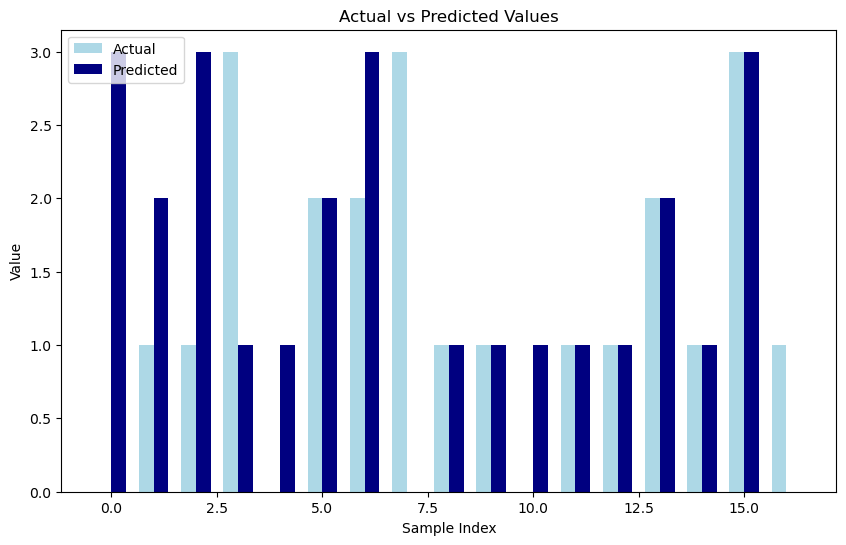

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define bar width
bar_width = 0.35

# Plot actual vs predicted values using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(y_test)) - bar_width/2, y_test, bar_width, label='Actual', color='lightblue')
plt.bar(np.arange(len(y_test)) + bar_width/2, predictions, bar_width, label='Predicted', color='navy')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
